In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D ,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop


Extracting data from dataset


In [3]:
import os

In [4]:
file="D:/Datasets/AgeGenderdetector/UTKFace"

In [5]:
model_file = os.listdir(file)

In [6]:
ages = []
genders = []
images = []
for fle in model_file:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total = file+'/'+fle
    print(total)
    image = cv2.imread(total)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

D:/Datasets/AgeGenderdetector/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg

D:/Datasets/AgeGenderdetector/UTKFace/10_0_4_20170104010810728.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20161220222001459.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170103175323250.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170103200654246.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109201728056.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109202251032.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109202346880.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203218966.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203245653.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203357787.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203427416.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203438428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/10_1_0_20170109203501969.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109204611305.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109204614249.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109204641514.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109204833458.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109204927071.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205013531.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205122664.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205125500.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205136852.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205211093.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205214234.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205216790.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/11_1_0_20170109205247087.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/12_1_1_20170109214204794.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_1_20170109214642524.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_1_20170112213303693.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_1_20170116225216163.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_1_20170116233629728.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170103200649030.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170103200922406.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170103201240488.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170104012405785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170109203838187.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170109214246240.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170116190115810.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/12_1_2_20170116194059753.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/13_1_4_20170104005210478.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/13_1_4_20170104005323135.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/13_1_4_20170117200640357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170102234323550.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170102234854353.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170103200600206.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170103200611317.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170103200615511.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170103201123159.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170104011738192.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170104012315465.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170104012341136.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_0_0_20170104013338922.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109212518607.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109212651931.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109212749213.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109212753539.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109212926958.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109213221821.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109213522480.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109213541777.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109213548658.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109213635068.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109214345916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109214349442.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/14_1_0_20170109214428765.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/15_0_4_20170103201002253.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_0_4_20170103201013615.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_0_4_20170103233214059.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_0_4_20170104011201568.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_0_4_20170110232416743.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170103200925950.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170103201148510.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170103201844088.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170104013418578.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170104013549874.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170105000525758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170109203414090.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/15_1_0_20170109203912357.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231215944.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231218369.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231219975.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231221050.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231230149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231517869.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231520320.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231521377.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231526097.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231527285.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231529568.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231532894.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_0_20170110231533988.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/16_0_4_20170104011805376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_4_20170110231631592.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_0_4_20170110232131606.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170102234708483.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170102234728107.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170102234805899.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170102234927276.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170103163010615.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170103201016775.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170103201213287.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170103201347823.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170103201602647.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/16_1_0_20170104011815680.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/16_1_4_20170104011755640.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170103201439825.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170103201534007.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170104003852806.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170104011408904.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170104011953696.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170104230556561.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170105183357879.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170105183607439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170105183615673.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170110231210547.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170110231233724.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_0_0_20170110231535087.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170114030019967.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170114030029194.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170114030031959.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170114030034621.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170114030037010.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170116234754901.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_1_20170117134939470.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_2_20161219190706307.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_2_20170104020251980.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_3_20170104221735351.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_3_20170104221822223.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_3_20170104221840229.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/17_1_3_20170104222027959.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170103201359471.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170103201500071.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170105002457379.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170105183423287.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109205411880.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212417557.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212422272.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212425897.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212530499.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212536049.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212538216.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_0_20170109212554810.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170114030334837.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170114030339628.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170114030424059.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170116000609057.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170116164854853.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170116211857195.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170117140105352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170117140201823.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_1_20170117140433352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_2_20170102234846172.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_2_20170102234919571.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_2_20170103223049176.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/18_1_2_20170104020418380.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/19_1_0_20170116205908124.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_0_20170116212113630.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_0_20170117140530071.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_0_20170119145731470.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170112191242381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170112231417629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170113012937783.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170114030819891.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170114030824961.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170117124021486.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_1_20170117195435822.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_2_20170104005053831.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/19_1_2_20170104015921814.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110205418587.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211513139.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211517802.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211535352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211536519.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211537870.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110211538942.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212552670.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212555368.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212601951.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212603790.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212623527.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_0_20170110212624891.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153127196.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153151084.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153209772.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153300420.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153318900.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153457308.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219153658004.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219154024292.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219154038141.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219154041477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219154354285.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219154715885.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219155349310.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200052700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200203132.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200242220.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200342123.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200427051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200503284.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219200532811.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201312292.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201319628.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201331164.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201403764.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201442357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20161219201523620.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170109192222822.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170109193535757.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170110212743721.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170110213009014.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170110213415212.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170110213523297.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170116194202388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_2_20170117195243732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161219190227867.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161219224423280.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161219224513831.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161219224544080.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161219224546584.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220110553.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220116873.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220154425.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220317465.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220355890.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220358441.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220411577.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220418690.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220529033.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220544050.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220606705.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_0_3_20161220220910514.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219204717605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219204750596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219205022813.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219205428229.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219205529388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219205534526.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219211440749.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219212433510.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219221127151.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219221246503.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219222133615.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219222653447.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20161219225855568.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194212472.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194244035.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194256082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194410994.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194413813.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194432489.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194433758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194452834.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194456866.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194458191.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194511600.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170109194642759.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_0_20170110212607474.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219202727078.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219202741628.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219202852780.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219202945116.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219203303165.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219203318222.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219203352244.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219203432220.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219204304845.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219204430596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219204523605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219204542005.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_2_20161219204636789.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143211359.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143213583.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143219502.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143222430.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143234887.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143239294.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143241765.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143303110.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143313302.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143335948.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143345775.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143348598.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_3_20161220143350174.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170103213044557.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170109191515501.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170109193346573.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170109193938953.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170109194502921.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170117192625477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/1_1_4_20170117192656755.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104020603909.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104230025073.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104230042553.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104230048181.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104230051977.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_0_0_20170104230054071.jpg.chip.jpg
D:/Datasets/AgeGend

D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175525991.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175629504.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175634288.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175636647.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175638671.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103175645974.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103201716816.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170103201733831.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170104005910664.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170104020801388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170104020855852.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170104021334149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_0_20170105000707730.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170108224234471.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170108224309241.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170109213154546.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170112003857668.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116163800040.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116163810477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116165621526.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116170350603.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116170358089.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116170359820.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116182714846.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170116194052786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/20_1_2_20170117141237688.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170114032016183.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170114032018810.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170114032058290.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170114032109958.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170115231442487.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116010312874.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116030053264.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116204921756.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116214205175.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116214828919.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116215535068.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116215541940.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_0_1_20170116215700416.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117142612442.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117142648466.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117142653808.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117193630115.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117193737828.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170117193748045.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_0_20170120134012302.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170103223257503.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170112191219486.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170112192949478.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170112192955750.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170112193005893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_1_20170112193009590.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104222758121.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104223626119.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231324474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231602346.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231611130.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231613281.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231627770.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231630017.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231631625.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104231633619.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104232011770.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170104233909843.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/21_1_3_20170105000657779.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113133336209.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113133350977.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113133405641.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113133555880.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113133604687.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113150439151.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113150441654.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113150443999.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113155002433.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113193211629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113195509981.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170113195511076.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_0_1_20170114030000815.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220644040.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220646631.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220816105.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220932996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220934918.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220936851.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220938702.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170116220950381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170117133125316.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170117141120129.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170117141131710.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170117143206386.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_0_20170117143702099.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172549492.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172557623.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172611887.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172613537.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172614669.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172619218.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172657692.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172659590.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172700901.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172702296.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172704437.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172705545.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_2_20170116172706771.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170112233746160.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170112233752904.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117143710577.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117143713802.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117145350418.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117193939053.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117193954085.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117193956629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/22_1_4_20170117193958245.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_0_20170104004006925.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_0_20170104004012222.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_0_20170105000754450.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_0_20170105184121759.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163804981.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163838933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163841604.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163843478.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163855005.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163856511.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163907693.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119163909413.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119164004428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119164006043.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119164007795.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119164028527.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_0_3_20170119164041958.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/23_1_0_20170117194120347.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_0_20170117194248629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170102233446754.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170103212737732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170103223013127.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112192422750.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112203929794.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112203943260.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112204431018.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112204436531.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112234048553.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112234052856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_1_20170112234139392.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104223436167.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104223556664.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231559289.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231753450.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231757866.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231800546.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231807345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170104231839354.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170105002606965.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170109132112364.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170116173247226.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170116173248641.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/23_1_3_20170117144123778.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116205530259.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116205634434.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116213539070.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116214204433.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116215529092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116215532270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116215611282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116220755400.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116221910075.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116221926893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116222146786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116222408305.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_0_20170116224743469.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170104020102786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170104020112732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170104021847349.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170104234829387.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170112003933482.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170112192345078.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116001001063.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116161806363.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116161813837.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116161834099.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116161844819.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116161928019.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_2_20170116162912973.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145341818.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145354835.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145619730.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145745474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145745635.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145915428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117145917765.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117194332787.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117194350012.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117194356247.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117194435668.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_0_4_20170117194540395.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20161223231304660.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150642259.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150644092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150731090.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150740282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150813388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150815148.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150817978.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150848786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150853517.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150858676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150901270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150909051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_0_20170117150911661.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116164334832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116200854756.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116222611638.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116222720224.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116222821392.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116224913775.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170116225255798.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170117013833600.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170117022255162.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170117164614871.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170117194553428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_1_20170117194632596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20161219201505604.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116172609939.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116172622785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116172642345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116172645816.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116172739067.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173353160.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173356200.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173403123.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173405460.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173412953.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173414881.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173417614.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_2_20170116173419546.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104231937977.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104231939707.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104231950346.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104231953658.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104232256105.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104232305465.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104232545657.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104234737428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104234808251.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104234822506.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104235106686.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170104235417596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_3_20170109131845240.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170104005830151.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170105183531601.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170115235433094.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170116214244943.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170116220449622.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170116222729168.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117010442715.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117145459404.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117150332484.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117150458348.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117150521764.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117150615516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/24_1_4_20170117150618462.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117190909786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117191222353.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117191852883.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117192134028.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117192356781.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117192955499.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117193011274.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117193028403.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117195019627.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117195027938.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117195127741.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117195250189.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_0_20170117195255340.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117140644345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117140649662.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117141454255.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117141539041.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117151048707.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117151130075.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117151555901.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170117151819492.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170119144441117.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170119144603197.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170119144812749.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170119150353974.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_0_3_20170119150637166.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116211917463.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116212058157.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116213524092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116220238281.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116220813532.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116220927378.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223120888.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223125337.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223812242.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223826765.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223827511.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223848612.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_0_20170116223849950.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112231543709.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112233635032.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112234214983.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235005249.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235032674.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235100153.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235102049.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235103240.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170112235144082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170113001625270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170113001941650.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170113005424686.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_1_20170113011500969.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175240492.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175241325.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175242392.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175243754.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175245111.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175247157.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175248545.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175249315.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175250125.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175251099.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175251901.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175255617.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_2_20170116175258251.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172137400.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172138225.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172140785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172141792.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172143516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172144676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172145553.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172147361.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172149792.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172151113.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119172152169.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_3_20170119195859404.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/25_1_4_20161220222242243.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210319560.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210319768.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210319774.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210319790.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210319942.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210604209.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210604814.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605010.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605220.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605280.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605342.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170113210605379.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172431020.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172433732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172442867.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172603774.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172613381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172620391.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172624038.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172630031.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172649700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172704775.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172707381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172737876.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_0_20170117172810523.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134729040.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134737474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134739602.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134742393.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134802314.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134808970.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113134812602.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135238738.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135240994.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135255058.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135256601.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135301873.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170113135304305.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116182136243.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116182254548.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116182256853.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116182311719.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116182622730.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116183512340.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116183514931.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116184632849.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116185225854.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116185229362.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116192055859.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116192106714.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170116192332618.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117200138532.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117200404157.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117200408766.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117200522916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117200630022.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117201041494.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170117201415686.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170120134513055.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170120134608943.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_1_20170120140251905.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20161219191301043.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170103181248536.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170104015801932.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170119184055239.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170119184056247.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170119184102087.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_2_20170120134050439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104214448709.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104214630381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104214717941.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104214719799.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104214726725.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104215431446.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104215715094.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104230250721.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170104230258265.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180508068.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180509236.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180511092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180512067.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180514197.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180528140.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180528964.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180530883.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180536092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180541276.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180602948.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180621828.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_3_20170119180622762.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152500051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152521052.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152714787.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152744875.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152758143.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117152801765.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153015117.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153017629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153025829.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153053957.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153243021.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153320853.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_0_4_20170117153355923.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116153214587.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116153823864.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116153830684.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116162357240.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116164040161.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116164344661.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116164911648.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116165702615.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116170915992.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116171048641.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116173105204.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116175417440.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170116180117686.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117171657311.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117172636235.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173257366.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173532444.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173557316.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173613245.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173639429.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173648397.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173739125.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173801797.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117173945869.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117174119845.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_0_20170117174144110.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112212042603.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112212048675.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213007903.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213016277.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213024014.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213031047.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213032340.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213041903.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213102254.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213116517.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213129055.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213133100.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170112213135759.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116013947455.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116014015136.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116014143675.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116021324542.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116021804434.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116021949852.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116022013916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116022019173.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116022038426.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116023808283.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116023936147.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116023939164.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116024021365.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231530890.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231532235.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231533347.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231826726.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231829268.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231831266.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231832606.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231834520.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231915148.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231923179.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231924481.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231925419.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_1_20170116231926819.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116163413372.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116163558042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116163914678.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116163918033.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116164549452.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116171202584.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116173312689.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116173710627.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116175323304.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116175333732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116175339024.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116175341740.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116175437182.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184147278.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184148142.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184149022.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184150015.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184151568.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184155381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184232333.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184235976.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184237219.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184241642.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184242565.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184243456.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_2_20170116184244368.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104222955855.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223003860.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223022663.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223033351.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223054575.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223128119.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223130527.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223133454.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223139599.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104223140343.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104231407282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104232120449.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170104232131633.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174540872.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174543231.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174552920.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174556511.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174603671.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174605432.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170117174606847.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119144411037.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119150012157.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119150754793.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119152455872.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119153452146.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119153809053.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193137914.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193138609.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193139298.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193139994.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193140714.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193141890.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193142729.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193143376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193144114.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193144786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193145481.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193146097.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_3_20170119193146682.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/26_1_4_20170117201953681.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/26_1_4_20170117202038959.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170102233409115.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170102233441859.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170102233549947.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170103181014215.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170103182122389.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170103182440137.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170104170103608.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170104171511929.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170104172424772.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170104193647416.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_0_20170104194530608.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170114034625293.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116001246691.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116001407357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116002826357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116010418660.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116024006905.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116024214004.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116030530533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116193152719.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116193905098.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116194835214.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116200549785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_1_20170116203636129.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119152437615.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119153330881.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119155943666.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119164157678.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119165911975.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193156857.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193158553.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193159666.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193205856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193212770.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193214716.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193229322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_0_3_20170119193230098.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120642103.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120644558.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120646100.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120648293.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120649662.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117120650933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117142744825.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117144358667.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117144846034.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117150919860.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117150925811.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117164325646.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_0_20170117173155398.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170104021418549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170104021735596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170104022251917.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170105161505810.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170109132133665.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116162015711.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116162057519.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116162537496.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116162544980.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116162949938.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116163003893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116163118798.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_2_20170116163123283.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170117180032189.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170117183509909.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170117191505796.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119144021952.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119145528477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119153535105.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119155424633.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119155634673.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119163731380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119164348390.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119193219282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119193234322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/27_1_3_20170119194359132.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117120938226.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117121808358.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117121833834.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117133953048.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117134016877.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117134849833.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117140820048.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117142910226.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117144444595.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117145726220.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117180126293.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117180135357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_0_20170117180137421.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113161017373.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113161237182.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113161434836.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113173600097.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113174140042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113174923924.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113175016716.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113175230916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113175442946.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113180628821.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113180639429.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113185214520.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_1_20170113190421608.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116164233720.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116164346840.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116164352558.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116165016235.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116170649686.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116170855714.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116170900610.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116172213528.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116173230898.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116175154482.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116180337639.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116190025951.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_2_20170116190048260.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194909970.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194919803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194920547.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194921298.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194921883.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194926283.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194927291.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194927932.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194928605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194929221.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194929915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194930475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_0_3_20170119194935202.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116220243853.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116220300753.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116220923600.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116221705370.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116221757650.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116221840111.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116221850018.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116222126409.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116223114979.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116223825024.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170116235010441.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170117003302256.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_0_20170117020138207.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116014109875.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116021913149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116021944520.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116023923708.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116024015361.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116152550099.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116164109844.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116164405234.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116164832811.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116170856613.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116171225686.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116171301974.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_1_20170116175812597.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165117020.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165121497.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165125979.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165133825.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165143580.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165147900.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165438870.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165503355.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165514344.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165530274.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165553955.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165557121.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_2_20170116165616595.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103181212270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103182235849.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103182238570.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103225940625.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103225950647.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103230506947.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103235043691.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103235557846.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170103235832524.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170104000708986.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170104165215184.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170105164121996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/28_1_4_20170109003009492.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180920915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180933082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180936418.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180942324.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180949666.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117180951076.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117190157234.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117202637960.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117202647791.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117202649479.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170117202657886.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170119195119659.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_0_20170119195149987.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/29_0_1_20170117202653255.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_1_20170117202706981.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_1_20170117204407433.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170104192909672.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170105163533012.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116161810177.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116162050789.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116162155755.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116163105337.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116163356668.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116163447230.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116163503418.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_0_2_20170116163545392.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104172544539.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104172655682.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104184312581.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104185616837.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104192921991.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170104235458939.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170105002624350.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170105163239939.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170105165153564.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170105172818813.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170109002758865.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170109010152767.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_0_20170109132341425.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116002146102.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116003342475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116003347103.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116003411532.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116010429516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116010545437.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116012146662.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116020932172.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116021333343.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116021359164.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116021626058.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116021855730.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_1_20170116023632884.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170103235218684.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170104165318736.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170104165735505.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170105171748652.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170113011257168.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170117123747223.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170117202704359.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170117202750455.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/29_1_4_20170117202752934.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_0_20161219154008997.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_0_20161219154439741.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_0_20161219160615893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_0_20161219160731126.jpg.chip.jpg
D:/Datasets/AgeG

D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219162438366.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219162504886.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219162614078.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219163415222.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219163447671.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190009084.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190245843.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190253835.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190509034.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190735147.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219190941315.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219191202354.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_2_20161219192150665.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103210125060.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103210341459.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103210452250.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103210801579.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103210928251.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103211006898.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103212058572.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103213256420.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_0_4_20170103230700225.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_0_20161219154424381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_0_20161219154458917.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_0_20161219154620268.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_0_20161219162255926.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219203838084.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219203903148.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219204046924.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219204458116.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219205100213.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211114077.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211123885.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211133165.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211255317.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211300054.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211617551.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211625838.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_2_20161219211744478.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103202812009.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103205101618.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103205810354.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210129538.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210335629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210746899.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210830609.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210839634.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210934483.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103210946139.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103211018347.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103212103556.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/2_1_4_20170103212142324.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117144411849.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117144600491.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117145938915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117150940669.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151314107.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151331469.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151438712.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151521587.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151539963.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117151826355.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117152309069.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117152404661.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_0_20170117153441021.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117140615401.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117142125041.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117171354562.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117171808851.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117181243676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117181249594.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117191447948.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117194500557.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117202813031.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117202825454.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117202828582.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117202835519.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_1_20170117202910591.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117151010732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117153249558.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117154305388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117194418932.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117200730006.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117202819247.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117202832830.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117202840206.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117202914440.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117202929576.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170117204104479.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_0_4_20170120133906735.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170103180631960.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117170803122.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117170934860.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117171117386.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117171346533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117171606522.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117174710486.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117174824936.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181115699.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181122764.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181332132.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181335004.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181336564.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_0_20170117181338019.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104020950540.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104021318733.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104021619821.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104022925822.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104164904841.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170104192931704.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170105002521620.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170105161432042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170105162719051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170105170141222.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170108234540565.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170116161303257.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_2_20170116161338805.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117132700450.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117142506618.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117144459082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117145238579.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117150440114.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117153305045.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117154720797.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181327196.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181328835.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181341092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181342861.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181345172.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/30_1_3_20170117181352869.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113151857048.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113173408993.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113173411619.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113174744610.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113175408636.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113175708996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170113182315918.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170114032310376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170116002854242.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170116003537510.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170116004652226.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170116010511938.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_0_1_20170116010634833.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103163445702.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103180729440.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103181436000.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103182528433.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103182531906.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103182536130.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103182729649.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103183155451.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103183408770.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103183716629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170103183812243.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170104172947139.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_0_20170104181343268.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/31_1_1_20170117164303317.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_1_20170117170047936.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_1_20170117171933533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20161219203219180.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20161219211907149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104020444076.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104020811717.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104020928085.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104022004181.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104023111549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170104234746818.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170105161436755.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/31_1_2_20170109003538257.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170116235403701.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170116235640652.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170116235740282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117000815389.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117010455142.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117021349237.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117091009872.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117091150717.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117092643676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117120556801.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117120718633.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117120858247.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_0_20170117120910383.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113182309733.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113183140758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113183229559.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113183741368.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113185204177.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113190349585.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170113195640844.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170114031959964.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170114032927412.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170115230958202.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170115234806792.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170116002236204.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_1_20170116002309943.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119160307619.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119160433674.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119162651590.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119162959965.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119164310053.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119171305632.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119181014212.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119184229278.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119192340778.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119200203836.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119200204548.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119200231708.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_0_3_20170119200235517.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116220851784.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116220856474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116220919526.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116221727711.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116221804392.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116222131069.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116222855361.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170116222912224.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170117001041422.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170117022346459.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170117091929838.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170117092300323.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_0_20170117093112387.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170115235516131.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170115235709297.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170115235801065.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116000551316.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116001955132.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116002032659.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116003159417.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116003208929.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116003223296.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116012153835.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116012209350.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116021012241.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_1_20170116021140504.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170117184329913.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119155703795.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119163219372.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200439598.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200440516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200441164.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200442044.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200442740.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_3_20170119200443572.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_4_20170103180839999.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_4_20170103225047472.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_4_20170103225837104.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/32_1_4_20170103230129305.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170105163852244.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170105183847334.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170107213730053.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170109001602570.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170112211922374.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170112235228201.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170112235509832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170116205749382.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170117134148014.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170117171111730.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170117174457343.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/33_1_0_20170117174727549.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134853215.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134854584.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134855475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134856428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134857915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134906182.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134908039.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134909111.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134910165.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134912040.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134913196.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134914071.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_0_20170117134916472.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170104202320617.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170105172336996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170105173426253.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170105173641996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170112205459219.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170116191643236.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170116191649461.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170116193015006.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170116193324984.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170116193420245.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170117182658629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170119165408941.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_0_2_20170119200711947.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104022106301.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104170153185.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104173038042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104174537956.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104233858010.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170104235402171.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170105001216267.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170105164157515.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170105164257004.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170105172420589.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170105172659429.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170108224549572.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_0_20170109004742195.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170105172720493.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170108224608753.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170109140259136.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170116171155691.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170116191659122.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_2_20170116193448303.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170104220713478.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170104235039092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170104235537715.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170104235729572.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170105000852573.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170105001226421.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/34_1_3_20170105002136348.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117122020502.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117123744051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117125815720.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117130045470.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117130116812.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117130506374.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117130944941.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117130952893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117131215811.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117134825736.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117134934676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117134935863.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117134936879.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191031043.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191042138.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191049755.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191246180.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191315042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191345092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191433859.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191728610.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117191910468.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117192120258.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117192314819.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117192319971.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_0_20170117193222963.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117130547843.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117134943933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117135003701.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117135116141.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117135244149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117135949737.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117141822660.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117141825261.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117141828539.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117141830394.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117141840057.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117142612894.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_1_20170117142753565.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104214246948.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104214512933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104214739069.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104215607486.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104220303838.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170104230642411.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170105172520740.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170109132951262.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170109140717487.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170116210123526.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170116235352900.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170117000810969.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_0_3_20170117134205757.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170103183453835.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170103230424865.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104165401426.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104165729457.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104171631209.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104171655778.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104181321972.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104181325301.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104192826910.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170104201705201.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170105162234814.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170105162344803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170105162358962.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117191520420.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117191606659.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117191616924.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117191955709.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117192047033.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117192840324.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117193055396.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117201013868.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117203256352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117203321066.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117203328856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117203415648.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_0_20170117203426544.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170105162414267.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170109010122762.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170112191512046.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116164245925.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116164633129.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116164706883.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116164727094.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116165645870.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116175203095.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116180021408.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116180729528.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116181252040.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/35_1_2_20170116181314698.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104181434717.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104181520477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104201153985.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104201829601.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104203841107.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104204247899.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104204301875.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170104205158732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170105163342059.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170105163417082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170105164112403.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170105170234235.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_0_20170105171802956.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113142408744.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113151003293.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113151337670.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113151650223.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113152022544.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113152749711.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113161345795.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113161458922.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113163308366.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113173237337.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113174252891.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113175738212.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_1_20170113182443806.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194325042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194613458.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194621194.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194656666.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194703786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119194743443.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119195452698.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119195506419.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119201708181.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119201732293.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119201733085.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119201740725.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_0_3_20170119201741572.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117171707768.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117183244102.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117183326086.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117183331622.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117183334597.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170117183349582.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170119192652946.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_0_20170120140736273.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_1_20170109132934818.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_1_20170109141849605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_1_20170112203914370.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_1_20170112204442403.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_1_20170112210525117.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119181235533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119183119334.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119191859753.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119192728122.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202133110.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202138661.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202142021.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202143325.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202144381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202208549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_3_20170119202210389.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_4_20170104172843788.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/36_1_4_20170104204341444.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170116205703656.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170116214356844.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117104624750.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117134417970.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117135940308.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117140332549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117143125092.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117154312933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117164034574.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117164236409.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117164255088.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117164339785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_0_1_20170117164349761.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170104194539720.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105000536252.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105165040044.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105170228540.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105172652727.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105172729613.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105172735429.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170105184000017.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170109002419306.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170109003001568.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170109134008515.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170109134546708.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/37_1_0_20170109142928166.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170113210126612.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170113210604697.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170114033044391.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116001012194.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116190022195.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116192041983.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116193939412.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116210112194.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116211634643.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116214350647.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116224644283.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116233110862.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_0_20170116235516373.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170117162532923.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170117165027105.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170117184516041.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119144055864.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119155935681.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119160316259.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119192003262.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202601638.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202607101.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202640517.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202709695.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202715190.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_0_3_20170119202726182.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116160907331.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116164329443.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116165617759.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116165625644.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116171343260.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116172524459.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116175444213.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116222328756.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116223044761.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116223105812.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116225245726.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116231308847.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/38_1_1_20170116233335593.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170116224915569.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117021547363.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117021613788.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117121745777.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117131210937.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117141453339.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117143412554.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154211467.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154216307.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154224460.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154233939.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154432514.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_0_0_20170117154434474.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104185134518.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104185638502.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104201025387.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104205026100.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104205624580.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104210047180.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170104235806251.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105000920922.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105001220803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105002727282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105003308781.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105164247586.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/39_1_0_20170105164520316.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212729799.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212732926.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212748579.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212752045.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212754904.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212807163.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212855714.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212934843.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110212956113.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110213041017.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110213048070.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110213136600.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_0_0_20170110213243664.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192027975.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192130439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192304730.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192346475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192420753.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192434126.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192746527.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192750346.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192758746.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192803099.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192805549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109192939414.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_0_20170109193021650.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219225534376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219225754439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219225830840.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230023400.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230106056.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230121032.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230125137.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230204712.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230259272.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230328993.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161219230521112.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161220145428645.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/3_1_3_20161220220451762.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117120447856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117120759137.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117121759794.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117130718950.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117130926545.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117131053164.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117131221514.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117133133334.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117133705952.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117133805950.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117133829948.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117134408032.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170117134415492.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/40_0_0_20170120223924629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170105164641662.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113133639818.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113135423609.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113135447177.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113135553050.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113141623772.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113142401365.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113142425444.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113151525270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113152055344.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113152103014.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_1_20170113152150416.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119204114783.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119204122502.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119204129150.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119204130582.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119204141439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119205347547.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119205507599.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119205959119.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119210046520.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119210144247.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119210206582.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119210237376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_0_3_20170119211711001.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170110153441199.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112205136114.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112214918832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112231359349.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112231504476.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112231614270.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112234122392.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112234224866.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170112234412839.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170113000039241.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170113000204402.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170113001043722.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/40_1_1_20170113001137947.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117131149828.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117133125264.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117133145780.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117140625076.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154648336.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154650158.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154651236.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154652529.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154653654.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154713956.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117154715268.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117170716995.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_0_0_20170117171015249.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/41_1_4_20170104204946628.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_1_4_20170116001848468.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/41_1_4_20170117203902928.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170103181301064.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104170602137.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104172830274.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104181513925.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104183950934.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104184018702.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104184335702.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104203854642.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104204536019.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_0_20170104204628725.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/42_0_1_20170117171122662.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_1_20170117171124190.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_1_20170117171459684.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_1_20170117171503046.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_1_20170117171628313.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104165448593.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104172454139.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104181453181.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104184350086.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104192610039.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104192842031.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104204819596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_0_2_20170104205142164.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170113012800201.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170113013004135.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170113013008103.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170113135411027.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170113182842126.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170116021841454.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170116153229826.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170116160733333.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170116214643802.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_1_20170117163844791.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_2_20170104201224233.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_2_20170104204657182.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/42_1_2_20170107212130951.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/43_0_3_20170119204551990.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_3_20170119204553167.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_3_20170119204554406.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_3_20170119211655721.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_4_20170104000923085.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_4_20170104174223892.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_4_20170104205649403.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_4_20170117135938595.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_0_4_20170117204014422.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_1_0_20170103183352530.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_1_0_20170103183354850.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_1_0_20170103183357706.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/43_1_0_20170103183401202.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119195210483.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119195216221.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119195247387.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200316171.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200334516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200511259.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200652604.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200725971.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200835996.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119200840702.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119204704727.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/44_0_3_20170119204716767.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117170513474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117170741266.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117170928114.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117170948114.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117171124852.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117171151786.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117172129436.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117172231908.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117172531012.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117172543924.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117173032588.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117173552477.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_0_20170117174733520.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117141846901.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117143253063.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117154348380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117165523332.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117165545265.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117165650390.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117170533401.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117171145629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117171914289.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117172020917.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117173736387.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117175348238.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_1_20170117181136802.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202040629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202044372.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202051271.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202458980.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202559894.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202700364.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202703548.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119202720533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119203810871.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119203815607.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119203905073.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119203944694.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_0_3_20170119203950879.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170116160543061.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170116162143245.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170116233320931.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170116234410850.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117001154223.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117140432386.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117141755026.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117145052555.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117154449503.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117164716460.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117164742977.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_1_20170117183357517.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/45_1_2_20170107211934472.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119183135878.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119183229046.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119183449213.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119195012113.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119195336586.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119200449365.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119200749075.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119201157876.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119202242015.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119202435756.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119204754151.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119204802431.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/46_0_3_20170119204808215.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117013717257.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117135913231.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117135932141.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117135954024.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117155944017.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117160009711.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117160014001.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117160014951.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117160016192.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117160350201.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117165141482.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117171447454.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_0_0_20170117190246626.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/47_1_3_20170119202200788.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_1_3_20170119202206348.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_1_3_20170119205256352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_1_4_20170103234719420.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/47_1_4_20170104181336102.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104182220669.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104184236333.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104184719245.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104184737717.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104193619832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104201250552.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104210544269.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_0_0_20170104211541076.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170104185815758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170105000634011.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170105173544229.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170108224903494.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109010620232.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109011221762.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109135746831.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109141729566.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109142203204.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109142311780.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109220537701.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109220544479.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/48_1_0_20170109221004139.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170103181849281.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104183921310.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104184001972.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104184230952.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104184759926.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104185000777.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104185034878.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104185051510.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104185652921.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104192623743.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104204953660.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104205013876.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/49_1_0_20170104210205882.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/4_0_0_20170110224705396.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_0_20170110224817102.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_0_20170110225200150.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_0_20170110232756133.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_1_20161219230428976.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_1_20170104010848776.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_1_20170110213311678.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_1_20170110213631827.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_1_20170116153056871.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_2_20161219140938368.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_2_20161219141105897.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_2_20161219141202384.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_0_2_20161219141410544.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/4_1_0_20170110213431280.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_0_20170116200920314.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_0_20170116215618294.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_0_20170117201312381.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_0_20170119144520789.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20161219160210758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20161219160501453.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194520772.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194523891.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194530016.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194538070.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194638149.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/4_1_1_20170109194656449.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104170550929.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104181517653.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104184249918.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104202456587.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104202616026.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104204857675.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104205729700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104210147596.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104210539348.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104211514100.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104211603916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104211706898.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170104212118221.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170120222416184.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170120222743386.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170120222745802.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170120222751913.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_0_20170120222755737.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170104210950012.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170111194904758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170111203545405.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170111204143668.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170113134715664.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170113135543842.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170113142149603.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_1_20170113142324284.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205352398.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205421127.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205442263.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205521664.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205526776.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205527856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205528760.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205530376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205531336.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205537439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205538583.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205539984.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_0_3_20170119205540968.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/50_1_2_20170104023119069.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_2_20170104210635740.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_2_20170104235513244.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_2_20170107212204715.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_2_20170116173220910.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170104181430093.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170104235532885.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170109011047973.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170109134207312.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170109141335415.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170117143102562.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170117151044708.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/50_1_3_20170117153134813.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/51_0_3_20170119205630063.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_0_3_20170119211842089.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_0_4_20170104193634471.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_0_4_20170104210348196.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_0_4_20170104210502395.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_0_4_20170104211801364.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170103183556395.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170104170143329.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170104183749773.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170104205943165.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170104212206804.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170109010116440.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/51_1_0_20170109132703508.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170113184049447.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170113184840654.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170116183903737.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170116192911629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170116192914190.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170116214143475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170116233057278.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117135533022.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117154814549.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117154823449.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117154831559.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117154856649.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_0_0_20170117160940615.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170105172742757.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170105173045268.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170105184031767.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170108235321768.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109012706985.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109013524205.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109132305364.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109142345793.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109220548552.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109220625669.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109220918442.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109220926115.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/52_1_0_20170109221054399.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170113184718824.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170113184910088.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170113184913361.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170113184941808.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170113190631147.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170116232802899.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117154958988.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161102128.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161103166.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161104318.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161105279.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161109630.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_0_0_20170117161110830.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170109221042561.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122130739.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122404436.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122530359.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122533941.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122611684.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110122634608.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110123801468.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110124135439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110131645457.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110132139134.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110140721731.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/53_1_0_20170110141003065.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109010040814.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109010246118.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109012848473.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109013343077.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109013346505.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170109150353590.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111171747438.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111171747448.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111195744986.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111195752794.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111195806193.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111195832210.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_0_20170111195904169.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117183554529.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117183557856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117185822383.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117190009561.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117190013790.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117190137490.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117190531158.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117191348426.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117191411795.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117191441764.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117191450148.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170117194908404.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_0_1_20170120222533712.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170103183727146.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170103183730785.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170103183742275.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170103183759282.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104184901670.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104185045990.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104212730503.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104212735309.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104235238436.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104235913154.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170104235918548.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170105173508749.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/54_1_0_20170109010202728.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170113184836584.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170113185136832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170113190612249.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170116193520434.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170116222002492.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170116232628323.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170116232725357jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117000800699.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117135302098.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117135534039.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117135556303.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117135625808.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_0_20170117143101440.jpg.chip.jpg
D:/Datasets/A

D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171322926.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171327855.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171706159.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171728191.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171757096.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171804112.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119171830808.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119180718883.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119180725108.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119180841322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119181035677.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119181109749.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_0_3_20170119181128452.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/55_1_3_20170119195255556.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_1_3_20170119200044963.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/55_1_4_20170117203853447.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104182229743.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104184302965.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104184554798.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104184930061.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104201536050.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104203949915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104210115763.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104210554380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104210832380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_0_20170104211806996.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170105180548406.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170105180722614.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170105180725694.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170109142154230.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170109142456550.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170113182258142.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170113190509801.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170113190651833.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170117191908449.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170119152358239.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170119174930466.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170119180731484.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_0_3_20170119180848388.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170109141321745.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170109141502576.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170109142023203.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170109142113189.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170109142228705.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170119181445803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170119183420176.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170119192943673.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/56_1_3_20170119211416888.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/57_0_0_20170103183943554.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/57_0_0_20170104183717886.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/57_0_0_20170104184213430.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/57_0_0_20170104185225142.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173528685.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173531229.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173550604.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173557845.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173559373.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173628294.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170105173636909.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109010225320.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109010542295.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109012156576.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109012537557.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109012759314.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_0_20170109013758613.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170111170138036.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170111200022771.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170111210843429.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113174734929.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113174947234.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113175352418.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113182450903.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113184850673.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113184906215.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113185038112.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113185227312.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113185358000.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_0_1_20170113190411755.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/58_1_0_20170117204753192.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_0_20170117204758881.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_0_20170120224803945.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170112213645366.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170112224053755.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170112224110700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170113000640931.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170113012118016.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170113012151936.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170113012224304.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170113185350033.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170117194006047.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/58_1_1_20170117194028702.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110212841807.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213118425.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213149382.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213200213.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213322127.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213357051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213420350.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213554657.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213615044.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110213625162.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110215706020.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110215835907.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_0_0_20170110215925587.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20161220220819682.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20170103180249368.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20170104010044345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20170112210544957.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20170112235010687.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_1_20170117192704482.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219142021464.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219142215457.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219142421601.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219142543345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219142641921.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219151522483.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/5_1_2_20161219151834275.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170116235438949.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170116235858675.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117001131850.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117001135611.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117001221298.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117091256462.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117092311960.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117135052544.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117135546570.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117135823609.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117153701292.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117153710684.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_0_0_20170117155525709.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170104185020782.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170109221030205.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122425732.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122430900.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122522956.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122526605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122544644.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122614299.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122626700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122826993.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110122932443.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110123131564.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_0_20170110123158902.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/60_1_1_20170120222320336.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_1_20170120222504473.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_1_20170120223635158.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_2_20170105174330388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_2_20170110151419801.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_2_20170116192433309.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_3_20170109141933202.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_3_20170109142555460.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_3_20170119171437890.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_3_20170119204012575.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_3_20170119205944312.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/60_1_4_20170103230632265.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_0_20170103181621665.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211812241.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211813409.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211815067.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211816513.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211817688.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211818505.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211819474.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211835296.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211849977.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211851089.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211851937.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211852753.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/61_0_3_20170119211853505.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170113182604718.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170113184117629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170113184846159.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170113185008129.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170113190628890.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170116204827125.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170117154841208.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170117175059690.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170117183538747.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170117183848283.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170117191622380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_1_20170120221526053.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/62_0_2_20170104212649180.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170117195020915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170117195022504.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170117195024577.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170117195107740.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120223104851.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120223438029.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120225657034.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120225659313.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120225701457.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120225708577.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_0_20170120225710313.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_1_20170111170153874.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/63_0_1_20170116235836887.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111201030222.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111201117758.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111201922080.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111201953344.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111202227430.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111202238826.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111203557764.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111203730182.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111203752191.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111204015410.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111204905982.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111204914864.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_0_20170111205148232.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170104215624533.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170105180657742.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170109143021566.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170112222321514.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170117143046787.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170117161025414.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170117171142579.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170117190407347.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170117191735066.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170119164246893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170119171819688.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170119201141428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/65_0_3_20170119203933382.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170105173731829.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170109013237361.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170109015504776.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170111203309589.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170111210358051.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170111222127534.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170116233247357.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170116233250943.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170117000141332.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170117175358556.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170117191832603.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170120221744629.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/66_0_0_20170120225917395.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/67_0_2_20170112224619492.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_2_20170112224629884.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_2_20170116193956693.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20161220221736930.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170105175613302.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170105181005916.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170116193543456.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170117134845691.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170119212008184.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170119212009145.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170119212010042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170119212012082.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/67_0_3_20170119212019810.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110132430273.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110140321752.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110141150729.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110141522160.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110143337087.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110143406927.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110143529881.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110153021285.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110155156093.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110160644032.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110175311202.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110175345439.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/68_1_0_20170110175703443.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109194210604.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109194218239.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201058867.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201628566.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201721681.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201806817.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201829191.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201852729.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201856463.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201859697.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109201925765.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109202302115.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/6_1_0_20170109203213701.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117171305844.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117171634067.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117172220586.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117172631161.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117172840833.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117172906417.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173225496.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173242519.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173632929.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173644159.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173652480.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173655936.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/70_0_0_20170117173727535.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170104185305424.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170104213311644.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170104213443413.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170109015622110.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170111195259809.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170111203734910.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170111204446510.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170111210043449.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170111222535839.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170116232642012.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170120225501322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170120225641832.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/71_0_0_20170120225652609.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170110183814706.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170110183821487.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170110184007710.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170110184104942.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170120223859838.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_0_20170120224942952.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_1_20170112215442392.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_1_20170116182041881.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_1_20170120223941518.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_1_20170120225033578.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_2_20170110181718497.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_3_20170104220952910.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/72_1_3_20170109142938059.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111201904798.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111202232554.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111202241586.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111203722942.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111203745246.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111203855367.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111203916648.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204138781.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204348525.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204722982.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204808623.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204851535.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_0_0_20170111204855557.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120222715178.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120225350768.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120225456154.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120225821626.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120230123756.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_0_20170120230326690.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_1_20170105003534605.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_1_20170110182126367.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_1_20170112211657821.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_1_20170113013039564.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_2_20170110182818569.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_2_20170112224034603.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/75_1_3_20170110175327928.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170111222529376.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170111222546535.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170111223343146.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170111223832508.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170112224707532.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170116233355259.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170117184536534.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120223021915.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120223933893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120224525249.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120225240993.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120225718369.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/78_0_0_20170120230506347.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/7_0_0_20170110225222391.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_0_20170110225232046.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_0_20170112211931030.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170110220029050.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170110220056218.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170110223522905.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170110224345168.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170110224720024.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170113145233558.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170113145509278.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170113161247843.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170114025451554.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/7_0_1_20170114031543966.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111205626183.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111205921074.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111210128898.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111210305500.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211324676.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211335909.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211441005.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211457352.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211508161.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211628015.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111211700924.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111221815342.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_0_0_20170111221949087.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/80_1_0_20170120222028750.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_0_20170120222314991.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_0_20170120223534893.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_1_20170116153903211.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_1_20170117193146273.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_1_20170119210040345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_1_20170120222433936.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_2_20170119211723865.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_2_20170120223552933.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_3_20170109151103678.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_3_20170119212033985.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/80_1_4_20170110184132973.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/81_0_0_20170111201206317.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170110183613267.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205432369.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205438305.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205512345.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205823547.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205830721.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205839209.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205915994.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111205957066.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111210013098.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111210017033.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111210319130.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_0_0_20170111210408610.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110183823331.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110183935393.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110183956388.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110183957671.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184001159.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184025360.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184027031.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184040927.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184045236.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184106700.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184107806.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170110184114479.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/85_1_0_20170111205811953.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120134913783.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120140102078.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120225747122.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120230153314.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120230317497.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120230330380.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_0_20170120230401803.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_1_20170110183118502.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_1_20170113013105818.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_1_20170116233427954.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_2_20170110182404089.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_2_20170112003903252.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/88_1_3_20170110182157752.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/8_0_4_20170117133054476.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20161220223020578.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170103162925343.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170103200353070.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170103200956895.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170104005606487.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109194048333.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109200833660.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109200841548.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109200918322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109201053203.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109201107015.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109201110396.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205303856.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205311048.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205329922.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205351904.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205416266.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205426790.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205428806.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170109205515528.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170116200940428.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170116234733445.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170117154607954.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170117175651555.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/8_1_0_20170117175940947.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170111210301275.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170111210435708.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170111210740854.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170111223901221.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170112224517852.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_2_20170112224606516.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_0_3_20170111210252274.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110143355280.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110155210772.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110172628748.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110175738208.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110175843628.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/90_1_0_20170110180120743.jpg.chip.jpg
D:/Datasets/

D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220238481.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220239466.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220240322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220241330.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220311291.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220312322.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220339426.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220351738.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220406314.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220411186.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220413289.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220427042.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_0_0_20170110220441522.jpg.chip.jpg
D:/Datasets/AgeGenderdete

D:/Datasets/AgeGenderdetector/UTKFace/9_1_0_20170110224621441.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_0_20170117172655681.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_0_20170117180006484.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_1_20170109201837354.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_1_20170117105556810.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_2_20161219190524395.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_2_20161219192342173.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_2_20161219204347420.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_2_20170102235115156.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_2_20170104020210475.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_3_20161219225144784.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_3_20161220222856346.jpg.chip.jpg
D:/Datasets/AgeGenderdetector/UTKFace/9_1_3_20170104222949455.jpg.chip.jpg
D:/Datasets/AgeGenderdete

In [7]:

for fle in model_file:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

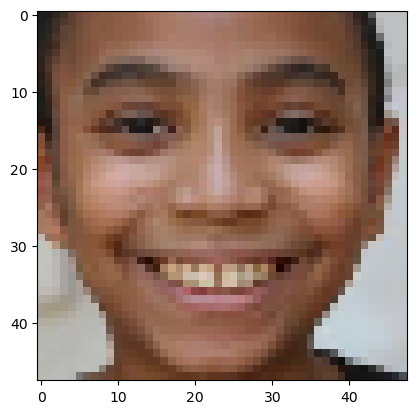

In [8]:
plt.imshow(images[87])

In [9]:
print(ages[87])
print(genders[87])

10
0


In [10]:
images_f = np.array(images)
age_f = np.array(ages)
gender_f = np.array(genders)


In [11]:
np.save(file+'image.npy',images_f)
np.save(file+'age.npy',age_f)
np.save(file+'gender.npy',gender_f)

In [12]:
 v ,counts= np.unique(gender_f,return_counts=True)
print(counts)

[12391 11317]


plotting number of male and female samples


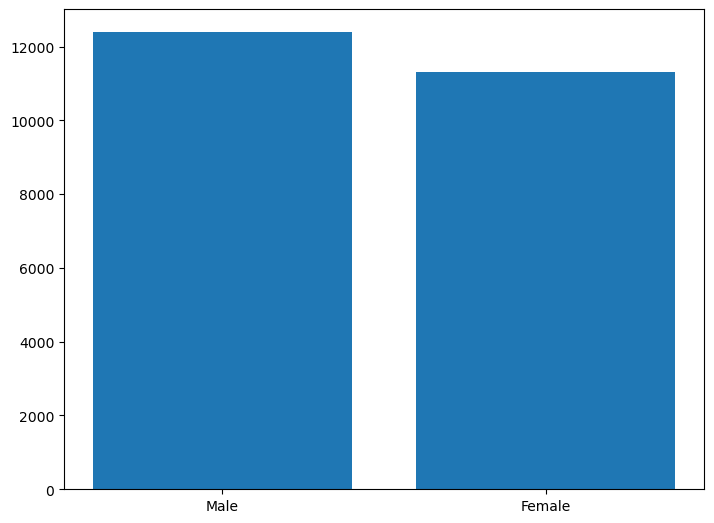

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
p_genders = ['Male','Female']
values = [12391 , 11317]
ax.bar(p_genders, values)
plt.show()

In [14]:
values , counts = np.unique(age_f , return_counts = True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [15]:
val = values.tolist()
cnt = counts.tolist()


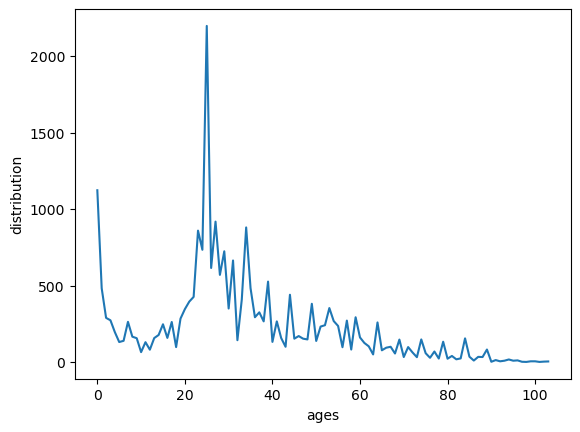

In [16]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [17]:
labels = []
i = 0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

In [18]:
images_f_2 = images_f/255
images_f.shape

(23708, 48, 48, 3)

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f = np.array(labels)

In [21]:
labels_f.shape
labels_f[0]

array([100,   0])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2,labels_f,test_size = 0.25)

In [24]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[1][0:5]

array([68, 31, 46, 65, 22])

In [26]:
Y_train[0:5]

array([[68,  0],
       [31,  0],
       [46,  0],
       [65,  0],
       [22,  0]])

Defining the model


In [27]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name="sex_out")(drop_1)
    output_2=Dense(1,activation='relu',name="age_out")(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [29]:
M=model((48,48,3))

In [30]:
M.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [32]:
fil_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fil_s,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


In [33]:
History=M.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


278/278 [==============================] - ETA: 0s - loss: 17.5468 - sex_out_loss: 0.7076 - age_out_loss: 16.6994 - sex_out_accuracy: 0.5419 - age_out_accuracy: 0.0467
Epoch 1: val_loss improved from inf to 16.74234, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 182s 636ms/step - loss: 17.5468 - sex_out_loss: 0.7076 - age_out_loss: 16.6994 - sex_out_accuracy: 0.5419 - age_out_accuracy: 0.0467 - val_loss: 16.7423 - val_sex_out_loss: 0.6846 - val_age_out_loss: 15.9413 - val_sex_out_accuracy: 0.5576 - val_age_out_accuracy: 0.0454


C:\Users\Jolan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 15.3761 - sex_out_loss: 0.6486 - age_out_loss: 14.5940 - sex_out_accuracy: 0.6193 - age_out_accuracy: 0.0480
Epoch 2: val_loss did not improve from 16.74234
278/278 [==============================] - 173s 622ms/step - loss: 15.3761 - sex_out_loss: 0.6486 - age_out_loss: 14.5940 - sex_out_accuracy: 0.6193 - age_out_accuracy: 0.0480 - val_loss: 17.4226 - val_sex_out_loss: 0.6116 - val_age_out_loss: 16.6476 - val_sex_out_accuracy: 0.6641 - val_age_out_accuracy: 0.0454
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 12.6047 - sex_out_loss: 0.5793 - age_out_loss: 11.8221 - sex_out_accuracy: 0.7033 - age_out_accuracy: 0.0464
Epoch 3: val_loss improved from 16.74234 to 13.51501, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 183s 657ms/step - loss: 12.6047 - sex_out_loss: 0.5793 - age_out_loss: 11.8221 - sex_out_accuracy: 0.7033 - age_out_accuracy: 0.0464 - val_loss: 

Epoch 17/250
278/278 [==============================] - ETA: 0s - loss: 7.8806 - sex_out_loss: 0.3033 - age_out_loss: 7.1384 - sex_out_accuracy: 0.8685 - age_out_accuracy: 0.0480
Epoch 17: val_loss did not improve from 8.56128
278/278 [==============================] - 49s 177ms/step - loss: 7.8806 - sex_out_loss: 0.3033 - age_out_loss: 7.1384 - sex_out_accuracy: 0.8685 - age_out_accuracy: 0.0480 - val_loss: 9.7619 - val_sex_out_loss: 0.2643 - val_age_out_loss: 9.0531 - val_sex_out_accuracy: 0.8849 - val_age_out_accuracy: 0.0454
Epoch 18/250
278/278 [==============================] - ETA: 0s - loss: 7.6651 - sex_out_loss: 0.2979 - age_out_loss: 6.9166 - sex_out_accuracy: 0.8683 - age_out_accuracy: 0.0480
Epoch 18: val_loss did not improve from 8.56128
278/278 [==============================] - 49s 177ms/step - loss: 7.6651 - sex_out_loss: 0.2979 - age_out_loss: 6.9166 - sex_out_accuracy: 0.8683 - age_out_accuracy: 0.0480 - val_loss: 9.0992 - val_sex_out_loss: 0.2947 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 6.8514 - sex_out_loss: 0.2507 - age_out_loss: 6.0189 - sex_out_accuracy: 0.8933 - age_out_accuracy: 0.0480
Epoch 32: val_loss improved from 7.62999 to 7.46814, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 49s 175ms/step - loss: 6.8514 - sex_out_loss: 0.2507 - age_out_loss: 6.0189 - sex_out_accuracy: 0.8933 - age_out_accuracy: 0.0480 - val_loss: 7.4681 - val_sex_out_loss: 0.2645 - val_age_out_loss: 6.6166 - val_sex_out_accuracy: 0.8773 - val_age_out_accuracy: 0.0454
Epoch 33/250
278/278 [==============================] - ETA: 0s - loss: 6.9075 - sex_out_loss: 0.2465 - age_out_loss: 6.0686 - sex_out_accuracy: 0.8956 - age_out_accuracy: 0.0480
Epoch 33: val_loss did not improve from 7.46814
278/278 [==============================] - 48s 174ms/step - loss: 6.9075 - sex_out_loss: 0.2465 - age_out_loss: 6.0686 - sex_out_accuracy: 0.8956 - age_out_accuracy: 0.0480 - val_loss: 8.8517 - val_sex_out_los

278/278 [==============================] - ETA: 0s - loss: 6.5183 - sex_out_loss: 0.2233 - age_out_loss: 5.6006 - sex_out_accuracy: 0.9079 - age_out_accuracy: 0.0480
Epoch 47: val_loss did not improve from 7.46814
278/278 [==============================] - 49s 177ms/step - loss: 6.5183 - sex_out_loss: 0.2233 - age_out_loss: 5.6006 - sex_out_accuracy: 0.9079 - age_out_accuracy: 0.0480 - val_loss: 9.0098 - val_sex_out_loss: 0.2455 - val_age_out_loss: 8.0665 - val_sex_out_accuracy: 0.8930 - val_age_out_accuracy: 0.0454
Epoch 48/250
278/278 [==============================] - ETA: 0s - loss: 6.4418 - sex_out_loss: 0.2195 - age_out_loss: 5.5204 - sex_out_accuracy: 0.9077 - age_out_accuracy: 0.0480
Epoch 48: val_loss did not improve from 7.46814
278/278 [==============================] - 49s 175ms/step - loss: 6.4418 - sex_out_loss: 0.2195 - age_out_loss: 5.5204 - sex_out_accuracy: 0.9077 - age_out_accuracy: 0.0480 - val_loss: 7.7380 - val_sex_out_loss: 0.2426 - val_age_out_loss: 6.7906 - val

278/278 [==============================] - 49s 175ms/step - loss: 6.2895 - sex_out_loss: 0.2156 - age_out_loss: 5.3007 - sex_out_accuracy: 0.9081 - age_out_accuracy: 0.0480 - val_loss: 7.8501 - val_sex_out_loss: 0.2447 - val_age_out_loss: 6.8308 - val_sex_out_accuracy: 0.8942 - val_age_out_accuracy: 0.0454
Epoch 63/250
278/278 [==============================] - ETA: 0s - loss: 6.2425 - sex_out_loss: 0.2098 - age_out_loss: 5.2552 - sex_out_accuracy: 0.9122 - age_out_accuracy: 0.0480
Epoch 63: val_loss did not improve from 7.46814
278/278 [==============================] - 49s 176ms/step - loss: 6.2425 - sex_out_loss: 0.2098 - age_out_loss: 5.2552 - sex_out_accuracy: 0.9122 - age_out_accuracy: 0.0480 - val_loss: 7.9139 - val_sex_out_loss: 0.2413 - val_age_out_loss: 6.8924 - val_sex_out_accuracy: 0.8966 - val_age_out_accuracy: 0.0454
Epoch 64/250
278/278 [==============================] - ETA: 0s - loss: 6.2780 - sex_out_loss: 0.2058 - age_out_loss: 5.2900 - sex_out_accuracy: 0.9129 - age

Epoch 78/250
278/278 [==============================] - ETA: 0s - loss: 6.1552 - sex_out_loss: 0.1972 - age_out_loss: 5.1259 - sex_out_accuracy: 0.9165 - age_out_accuracy: 0.0480
Epoch 78: val_loss did not improve from 7.46814
278/278 [==============================] - 51s 185ms/step - loss: 6.1552 - sex_out_loss: 0.1972 - age_out_loss: 5.1259 - sex_out_accuracy: 0.9165 - age_out_accuracy: 0.0480 - val_loss: 8.3982 - val_sex_out_loss: 0.2465 - val_age_out_loss: 7.3184 - val_sex_out_accuracy: 0.8898 - val_age_out_accuracy: 0.0454
Epoch 79/250
278/278 [==============================] - ETA: 0s - loss: 6.2136 - sex_out_loss: 0.1913 - age_out_loss: 5.1872 - sex_out_accuracy: 0.9195 - age_out_accuracy: 0.0480
Epoch 79: val_loss did not improve from 7.46814
278/278 [==============================] - 58s 210ms/step - loss: 6.2136 - sex_out_loss: 0.1913 - age_out_loss: 5.1872 - sex_out_accuracy: 0.9195 - age_out_accuracy: 0.0480 - val_loss: 7.8556 - val_sex_out_loss: 0.2715 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 6.0596 - sex_out_loss: 0.1891 - age_out_loss: 4.9971 - sex_out_accuracy: 0.9218 - age_out_accuracy: 0.0480
Epoch 93: val_loss did not improve from 7.46814
278/278 [==============================] - 49s 175ms/step - loss: 6.0596 - sex_out_loss: 0.1891 - age_out_loss: 4.9971 - sex_out_accuracy: 0.9218 - age_out_accuracy: 0.0480 - val_loss: 8.0249 - val_sex_out_loss: 0.2607 - val_age_out_loss: 6.8896 - val_sex_out_accuracy: 0.8964 - val_age_out_accuracy: 0.0454
Epoch 94/250
278/278 [==============================] - ETA: 0s - loss: 6.0429 - sex_out_loss: 0.1849 - age_out_loss: 4.9827 - sex_out_accuracy: 0.9239 - age_out_accuracy: 0.0479
Epoch 94: val_loss did not improve from 7.46814
278/278 [==============================] - 48s 173ms/step - loss: 6.0429 - sex_out_loss: 0.1849 - age_out_loss: 4.9827 - sex_out_accuracy: 0.9239 - age_out_accuracy: 0.0479 - val_loss: 8.1696 - val_sex_out_loss: 0.2644 - val_age_out_loss: 7.0281 - val

In [34]:
M.evaluate(X_test,Y_test_2)

186/186 [==============================] - 4s 22ms/step - loss: 7.4681 - sex_out_loss: 0.2645 - age_out_loss: 6.6166 - sex_out_accuracy: 0.8773 - age_out_accuracy: 0.0454


[7.468144416809082,
 0.26453959941864014,
 6.616641998291016,
 0.8773409724235535,
 0.04538552463054657]

In [35]:
pred=M.predict(X_test)

186/186 [==============================] - 4s 22ms/step


In [36]:
pred[1]

array([[66.01961 ],
       [28.167902],
       [23.79158 ],
       ...,
       [72.197205],
       [20.590603],
       [30.821001]], dtype=float32)

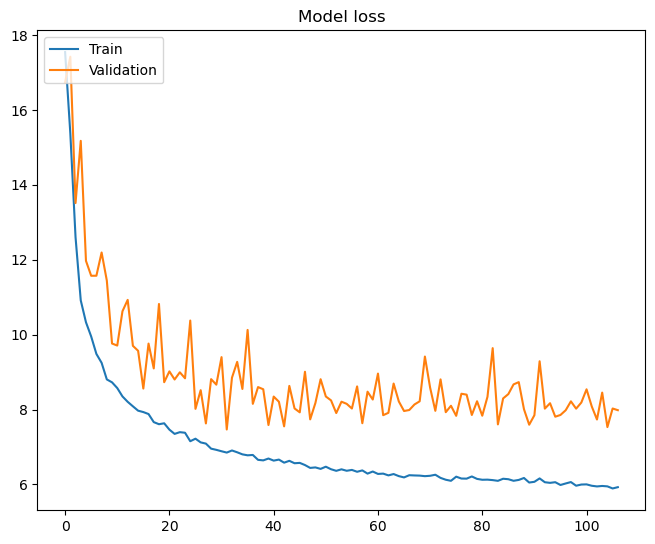

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel=('Epoch')
plt.y_label=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

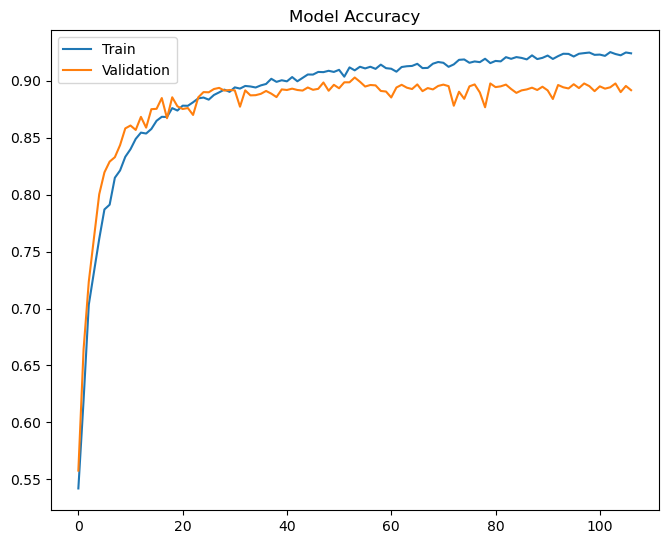

In [38]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35 )


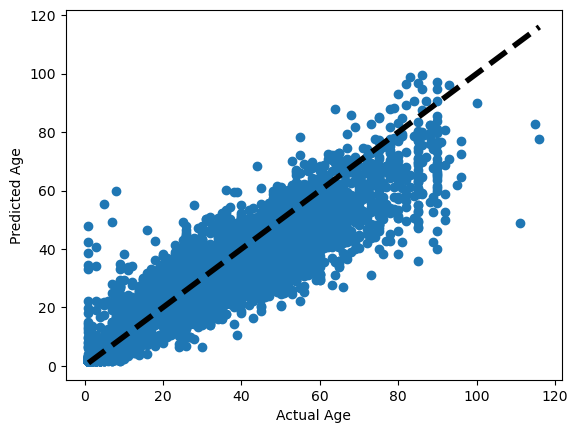

In [39]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


In [40]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [42]:
report=classification_report(Y_test_2[0],pred_1)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3107
           1       0.82      0.96      0.88      2820

    accuracy                           0.88      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.89      0.88      0.88      5927



<Axes: >

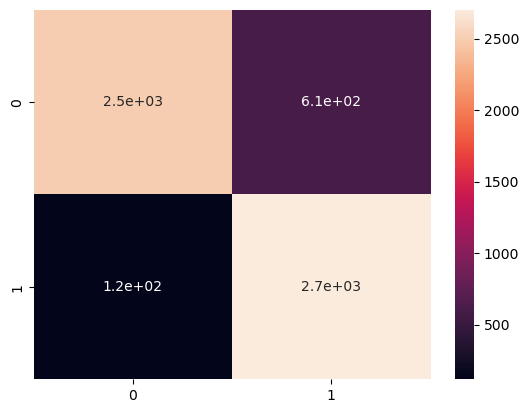

In [44]:
import seaborn as sns
results=confusion_matrix(Y_test_2[0],pred_1)
sns.heatmap(results,annot=True)

In [45]:
def test_image(ind,images_f,images_f_2,M):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_=M.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_[1][0]))
    sex=int(np.round(pred_[0][0]))
    print("predicted age "+str(age))
    print("predicted gender "+sex_f[sex])

1/1 [==============================] - 0s 48ms/step
predicted age 19
predicted gender Female


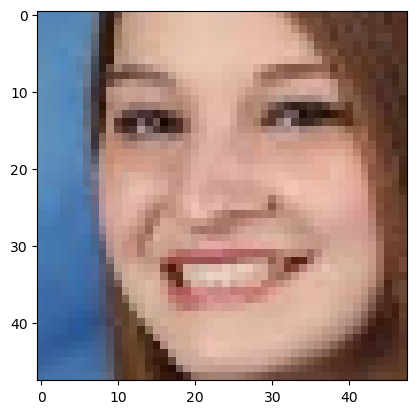

In [46]:
test_image(1288,images_f,images_f_2,M)